<a href="https://colab.research.google.com/github/Leomuch/Praktikum_KB/blob/main/2209106082_MuchlasAndreyPahlevi_Posttest3KB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Muchlas Andrey Pahlevi
NIM   : 2209106082**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/final_data.csv')

# Data Cleaning

## Handling Missing Value

Mengecek Missing Value

In [3]:
df.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


Tidak ada missing value

## Handling Duplicate
Mengecek Data Duplicate

In [4]:
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


## Handling Outlier

<Axes: ylabel='age'>

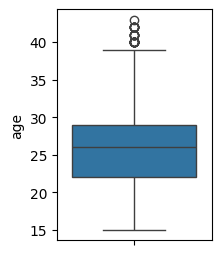

In [5]:
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(df['age']) #buat boxplot

### Metode IQR

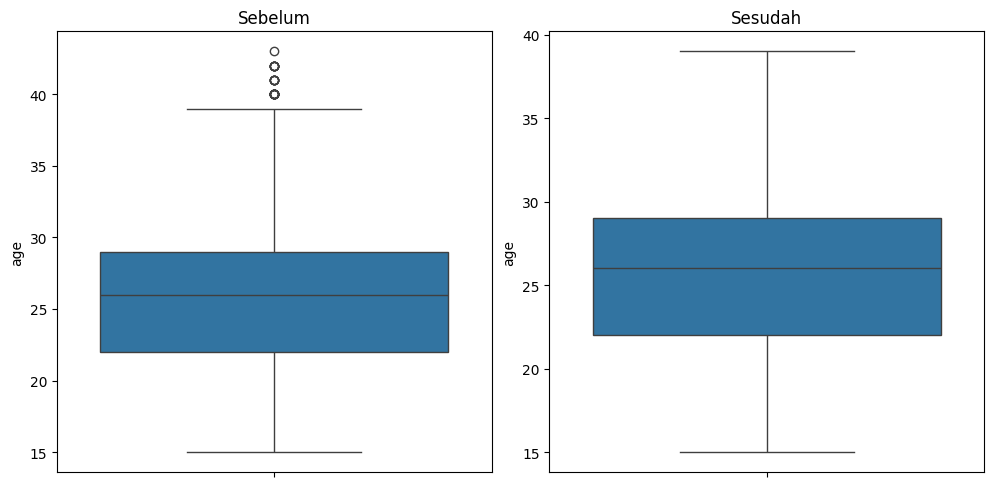

In [6]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
plt.tight_layout()
sns.boxplot(df['age'],orient='v',ax=axes[0])
axes[0].title.set_text("Sebelum")

# Menangani outlier dengan IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

#ambil nilai antara 1.5*IQR dari Q1 dan Q3 aja
df['age'] = df['age'][~((df['age'] < (Q1 - 1.5 * IQR)) |
(df['age'] > (Q3 + 1.5 * IQR)))]
#setelah handling oulier
sns.boxplot(df['age'],orient='v',ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()

# Normalisasi



In [7]:
#Menginisialisasi Min Max Scaller
scaler = MinMaxScaler(feature_range=(0,1))
#Numerical Columns
num_col_ = [col for col in df.columns if
  df[col].dtypes != 'O' and col != 'Id']
x1 = df[num_col_]
#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,0.66,0.708333,0.971963,0.000000,0.000000,0.000319,0.0,0.0,0.135250,0.003727,0.987382,0.017880,0.014749,0.141304,0.083333,0.35,0.000000,0.0
1,0.80,0.625000,0.140187,0.000000,0.000000,0.002301,0.0,0.0,0.138037,0.002301,0.137119,0.217114,0.171091,0.010870,0.008333,0.11,0.000000,0.0
2,0.64,0.916667,0.037383,0.000000,0.000000,0.000000,0.0,0.0,0.068493,0.010274,0.030705,0.296722,0.247788,0.043478,0.003333,0.03,0.000000,0.0
3,0.38,0.416667,0.766355,0.002497,0.014045,0.007491,0.0,0.0,0.000000,0.000000,0.673817,0.074500,0.064897,0.097826,0.277778,0.25,0.333333,0.0
4,0.70,0.625000,0.588785,0.001590,0.004472,0.001789,0.0,0.0,0.000000,0.000000,0.529022,0.101320,0.150442,0.228261,0.222222,0.40,0.333333,0.0


# Standarisasi

In [8]:
#Menginisialisasi Min Max Scaller
scaler = StandardScaler()
#Numerical Columns
num_col_ = [col for col in df.columns if
  df[col].dtypes != 'O' and col != 'Id']
x1 = df[num_col_]
#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,1.113373,1.273300,2.548245,-0.532971,-0.606773,-0.416711,-0.184919,-0.084128,2.454353,0.314349,3.422625,-0.433575,-0.463008,2.948703,1.250912,4.768555,-1.737002,-0.666387
1,2.117750,0.849093,-0.807041,-0.532971,-0.606773,-0.279250,-0.184919,-0.084128,2.511052,0.175438,-0.577159,2.237678,1.803642,-0.256629,-0.233422,1.183591,-1.737002,-0.666387
2,0.969891,2.333817,-1.221739,-0.532971,-0.606773,-0.438879,-0.184919,-0.084128,1.096013,0.951733,-1.077750,3.305038,2.915584,0.544704,-0.332378,-0.011398,-1.737002,-0.666387
3,-0.895381,-0.211423,1.718849,-0.413731,-0.214852,0.080861,-0.184919,-0.084128,-0.297651,-0.048552,1.947563,0.325564,0.264031,1.880259,5.099186,3.274820,-0.723122,-0.666387
4,1.400338,0.849093,1.002552,-0.457033,-0.481975,-0.314755,-0.184919,-0.084128,-0.297651,-0.048552,1.266422,0.685155,1.504273,5.085590,3.999679,5.515423,-0.723122,-0.666387


# Encoding

## One Hot Encoding

Menggunakan position untuk one hot encoding

In [9]:
ohe = OneHotEncoder(sparse_output=False)
oh_encoded = ohe.fit_transform(df[['position']])
categories = ohe.categories_[0]

encoded = pd.DataFrame(oh_encoded, columns=[f'position_{cat}' for cat in categories])
encoded.head(20)

,position_Attack,position_Attack Centre-Forward,position_Attack-LeftWinger,position_Attack-RightWinger,position_Attack-SecondStriker,position_Defender,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ordinal Encoding

Disini saya menggunakan ordinal encoding dari feature engineering Age_Category, jadi terlebih dahulu run feature engineering untuk Age_Category nya

In [13]:
oe = OrdinalEncoder()
df[['Age_Category']] = oe.fit_transform(df[['Age_Category']])
df['Age_Category'].unique()

array([ 3.,  0.,  1.,  4.,  2., nan])

# Feature Engineering

## Feature Engineering Age_Category

In [12]:
bins = [12, 18, 25, 30, 35, 40, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Veteran', 'Senior', 'Legend']
df['Age_Category'] = pd.cut(df['age'], bins=bins, labels=labels)
df[['age', 'Age_Category']].head(10)

,age,Age_Category
0,32.0,Veteran
1,30.0,Adult
2,37.0,Senior
3,25.0,Young Adult
4,30.0,Adult
5,30.0,Adult
6,28.0,Adult
7,31.0,Veteran
8,21.0,Young Adult
9,27.0,Adult


## Feature Engineering untuk mengecek ada atau tidak penghargaan yang di dapat

In [14]:
# Membuat kolom baru 'Has_Award'
df['Has_Award'] = df['award'].apply(lambda x: 1 if pd.notna(x) and x not in [0, ''] else 0)

# Tampilkan beberapa baris untuk verifikasi
print(df[['award', 'Has_Award']].head(10))

   award  Has_Award
0     13          1
1      1          1
2      4          1
3      9          1
4     21          1
5      1          1
6     10          1
7      7          1
8      0          0
9      4          1


### Bagi Training set dan Testing set dengan perbandingan 80 : 20
pada bagian ini saya membagi dataset menjadi training set dan testing set dengan proporsi 80 : 20 dengan menggunakan test_size = 0.2

In [15]:
X = df.iloc[:,:-1] # Target
y = df.iloc[:,-1] # Feature

In [16]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

#Melihat Dimensi Data X, y Train dan Test
print('Dimensi X train: ', X_train.shape)
print('Dimensi X test: ', X_test.shape)
print('Dimensi y train: ', y_train.shape)
print('Dimensi y test: ', y_test.shape)

Dimensi X train:  (8603, 23)
Dimensi X test:  (2151, 23)
Dimensi y train:  (8603,)
Dimensi y test:  (2151,)
